# _**Personality Clustering**_ #

1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
import warnings
warnings.filterwarnings("ignore")

2. Load Dataset & Initial Inspection

In [3]:
df = pd.read_csv("data/data-final.csv", sep="\t")

trait_cols = [col for col in df.columns if col.startswith(("EXT", "EST", "AGR", "CSN", "OPN"))]

df_traits = df[trait_cols]

print(df_traits.head())

   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN1_E  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...  3146.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...  2624.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...  1930.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...  3456.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...  8458.0   

   OPN2_E   OPN3_E  OPN4_E  OPN5_E  OPN6_E  OPN7_E  OPN8_E   OPN9_E  OPN10_E  
0  4067.0   2959.0  3411.0  2170.0  4920.0  4436.0  3116.0   2992.0   4354.0  
1  4985.0   1684.0  3026.0  4742.0  3336.0  2718.0  3374.0   3096.0   3019.0  
2  1470.0   1644.0  1683.0  2229.0  8114.0  2043.0  6295.0   1585.0   2529.0  
3  6665.0   1977.0  3728.0  4128.0  3776.0  2984.0  4192.0   3480.0   3257.0  
4  3510.0  17042.0  7029.0  2327.0  5835.0  6846.0  5320.0  11401.0   8642.0  

[5 rows x 100 columns]


3. Exploratory Data Analysis (EDA)

In [4]:
print(df_traits.isnull().sum())

df_traits.dropna(inplace=True)

df_traits = df_traits.sample(frac=0.08, random_state=42)

print(df_traits.describe())

EXT1       1783
EXT2       1783
EXT3       1783
EXT4       1783
EXT5       1783
           ... 
OPN6_E     1783
OPN7_E     1783
OPN8_E     1783
OPN9_E     1783
OPN10_E    1783
Length: 100, dtype: int64
              EXT1          EXT2          EXT3          EXT4          EXT5  \
count  81085.00000  81085.000000  81085.000000  81085.000000  81085.000000   
mean       2.64002      2.769846      3.283320      3.138719      3.279571   
std        1.26480      1.323276      1.214361      1.239249      1.276678   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        1.00000      2.000000      2.000000      2.000000      2.000000   
50%        3.00000      3.000000      3.000000      3.000000      3.000000   
75%        4.00000      4.000000      4.000000      4.000000      4.000000   
max        5.00000      5.000000      5.000000      5.000000      5.000000   

               EXT6          EXT7         EXT8          EXT9         EXT10  \
count  81085.0000

Descriptive Statistics and Visualization 

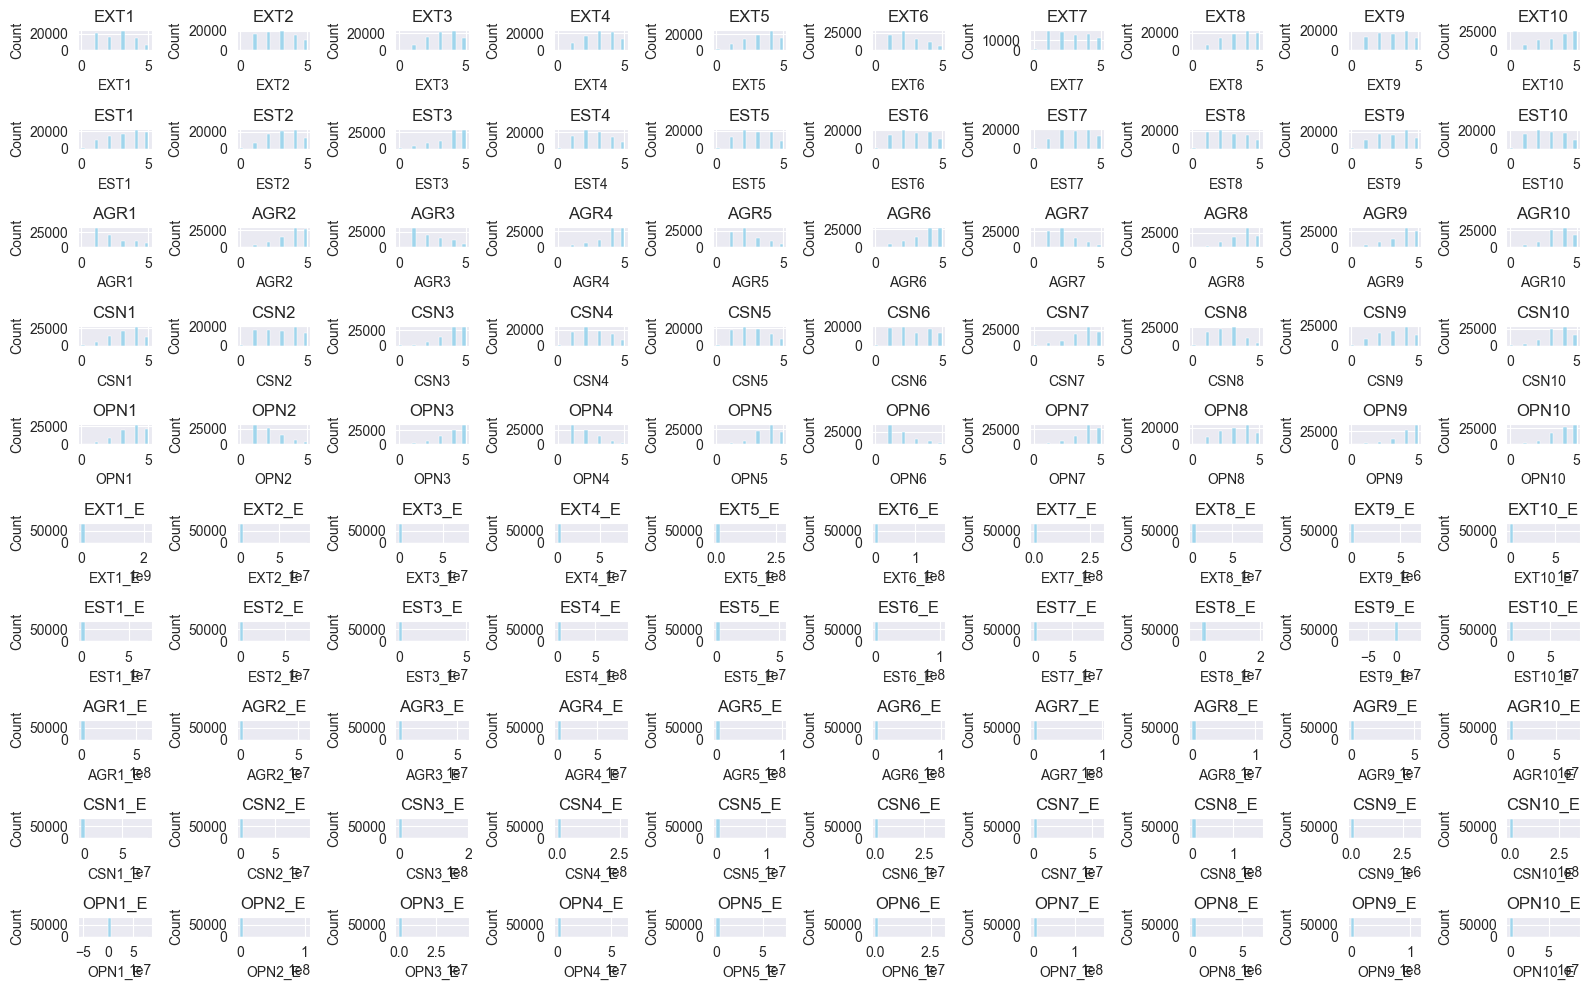

In [5]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(trait_cols):
    plt.subplot(10, 10, i+1)
    sns.histplot(df_traits[col], bins=20, kde=False, color='skyblue')
    plt.title(col)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.tight_layout()
plt.show()

Correlation Matrix

In [6]:
# plt.figure(figsize=(100, 100))
# sns.heatmap(df_traits.corr().abs(), annot=True, fmt='.2f', cmap='coolwarm')
# plt.title('Correlation Between Traits')
# plt.show()

Scaling and Dimensionality Reduction

In [7]:
scaler = StandardScaler()
df_traits = scaler.fit_transform(df_traits)

PCA(2D)

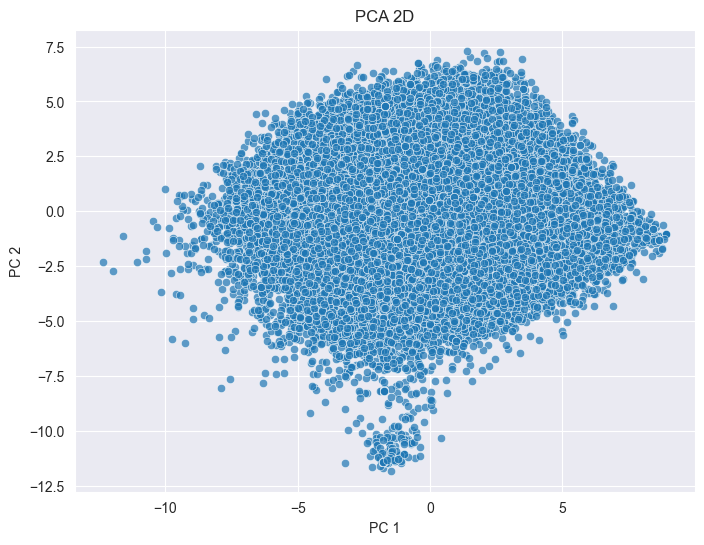

In [8]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_traits)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], alpha=0.7, cmap='viridis')
plt.title("PCA 2D")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

3. Clustering Models

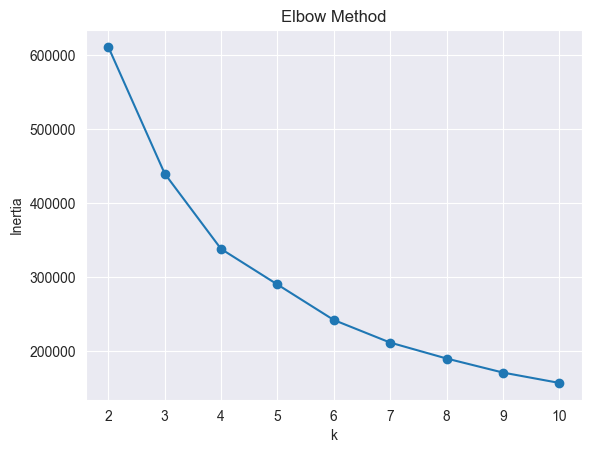

In [9]:
inertia = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(pca_data)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)
k_labels = kmeans.fit_predict(pca_data)

print("KMeans Silhouette Score:", silhouette_score(pca_data, k_labels))
print("KMeans DB Index:", davies_bouldin_score(pca_data, k_labels))

KMeans Silhouette Score: 0.3320953233577759
KMeans DB Index: 0.9161529546029497


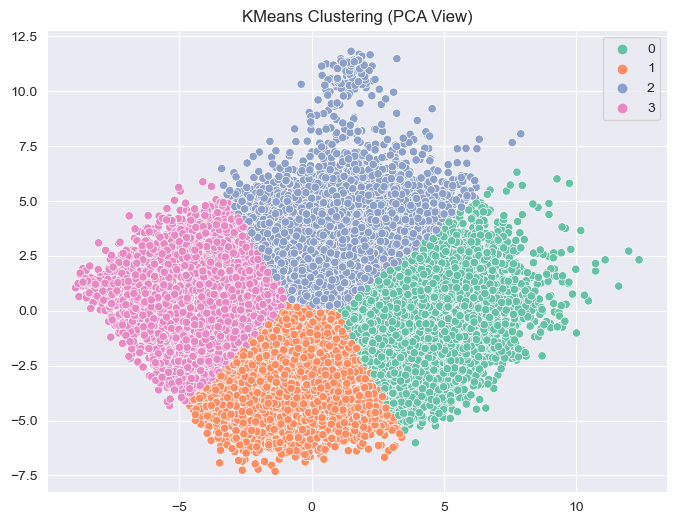

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=k_labels, palette='Set2')
plt.title("KMeans Clustering (PCA View)")
plt.show()

4. Hierarchical Clustering

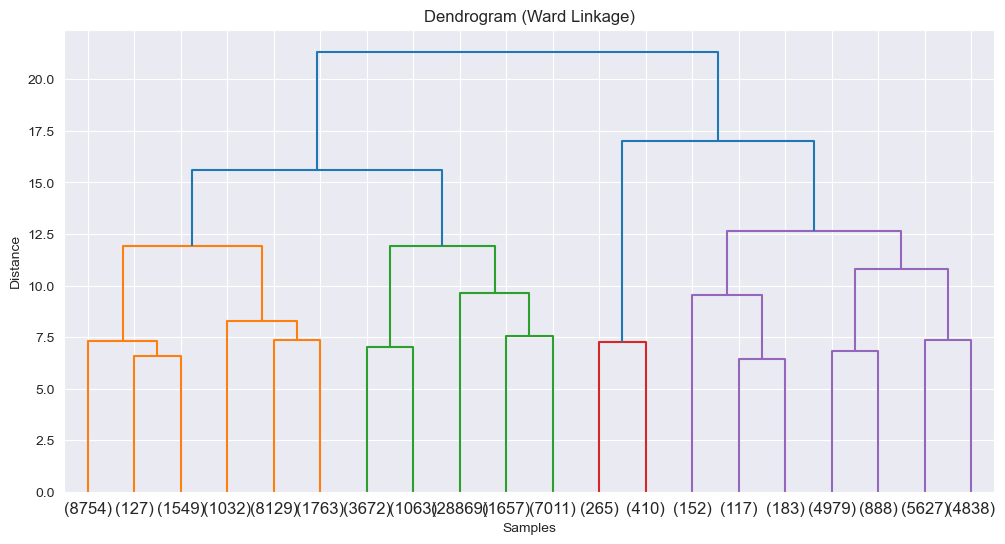

In [12]:
linked = linkage(pca_data, method='complete')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [19]:
h_labels = fcluster(linked, t=12, criterion='distance')

print("Hierarchical Silhouette Score:", silhouette_score(pca_data, h_labels))
print("Hierarchical DB Index:", davies_bouldin_score(pca_data, h_labels))

Hierarchical Silhouette Score: 0.24425274865279725
Hierarchical DB Index: 1.012610426859776


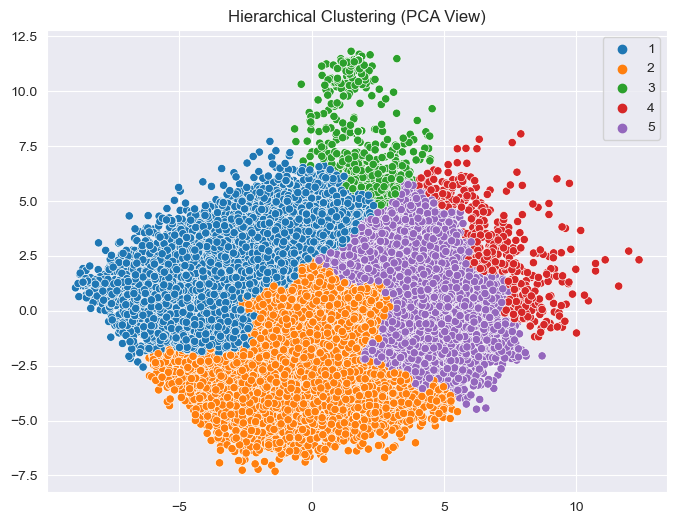

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=h_labels, palette='tab10')
plt.title("Hierarchical Clustering (PCA View)")
plt.show()

5. DBSCAN

In [34]:
dbscan = DBSCAN(eps=0.4, min_samples=10)
db_labels = dbscan.fit_predict(pca_data)

noise_pct = np.sum(db_labels == -1) / len(db_labels) * 100
print(f"Noise Points: {np.sum(db_labels == -1)} ({noise_pct:.2f}%)")

Noise Points: 231 (0.28%)


In [35]:
core_mask = db_labels != -1
if len(set(db_labels[core_mask])) > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(pca_data[core_mask], db_labels[core_mask]))
    print("DBSCAN DB Index:", davies_bouldin_score(pca_data[core_mask], db_labels[core_mask]))
else:
    print("Not enough clusters for DBSCAN metrics.")

DBSCAN Silhouette Score: 0.4841184148058159
DBSCAN DB Index: 0.3528261142652663


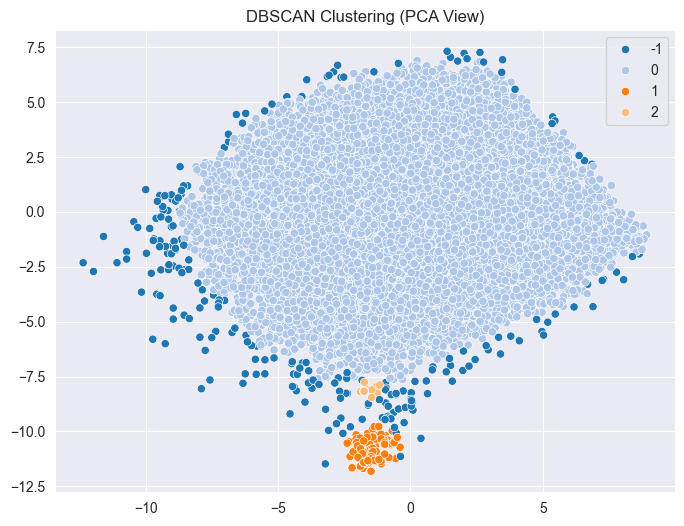

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=db_labels, palette='tab20')
plt.title("DBSCAN Clustering (PCA View)")
plt.show()

6. Interpretation

In [12]:
df_traits = pd.DataFrame(df_traits)

df_traits['KMeans'] = k_labels

cluster_profiles = df_traits.groupby("KMeans").mean()
print("Mean Trait Scores per KMeans Cluster:")
display(cluster_profiles)

Mean Trait Scores per KMeans Cluster:


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
KMeans,,,,,,,,,,,,,,,,,,,,,
0,0.592321,-0.570484,0.813955,-0.686321,0.725729,-0.579853,0.713176,-0.434115,0.524043,-0.722193,...,0.012788,-0.000164,0.005176,0.006128,0.012801,0.001746,-0.003921,-0.002287,-0.004180,-0.006803
1,-0.647062,0.641375,-0.846391,0.709532,-0.776081,0.684607,-0.717062,0.496743,-0.582726,0.675004,...,-0.000808,0.015001,-0.008347,-0.001040,-0.002614,-0.003010,-0.003635,0.012017,-0.005498,0.019415
2,0.302509,-0.344823,0.200466,-0.170328,0.365616,-0.311585,0.306102,-0.177609,0.270444,-0.092201,...,-0.000780,-0.005092,-0.006985,0.000458,-0.004724,0.002051,-0.003723,-0.006490,0.012141,-0.004662
3,-0.368084,0.401630,-0.288578,0.248628,-0.460191,0.332240,-0.430356,0.196852,-0.319681,0.223116,...,-0.011202,-0.007401,0.010686,-0.005765,-0.004882,-0.001462,0.011675,-0.000891,-0.005247,-0.005244
